<a href="https://colab.research.google.com/github/glysteric/TA/blob/main/TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [145]:
import librosa
import librosa.display
import soundfile
import os, glob, pickle
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
from IPython.lib.display import Audio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Audio
plt.style.use('seaborn-white')

In [146]:
def extract_feature(file_name, mfcc, chroma, mel):
    X, sample_rate = librosa.load(os.path.join(file_name), res_type='kaiser_fast')
    if chroma:
        stft=np.abs(librosa.stft(X))
    result=np.array([])
    if mfcc:
        mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result=np.hstack((result, mfccs))
    if chroma:
        chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
        result=np.hstack((result, chroma))
    if mel:
        mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
        result=np.hstack((result, mel))
    return result

In [147]:
# Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
# Emotions to observe
observed_emotions=['neutral','calm','happy','sad','angry','fearful', 'disgust','surprised']

In [148]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob('/content/drive/My Drive/TA/RAVDESS/Actor_*/*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, train_size= 0.75,random_state=9)

In [151]:
# Split the dataset
import time
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [152]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(1080, 360)


In [153]:
# Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


In [161]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot for audio with {e} emotion', size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

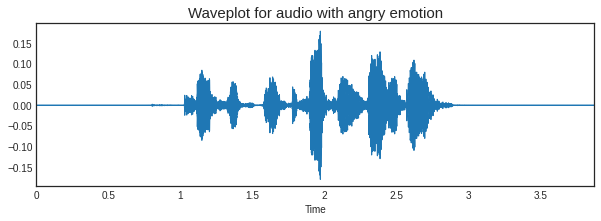

In [162]:
emotion='angry'
path = '/content/drive/My Drive/TA/RAVDESS/Actor_01/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)


(20, 167)


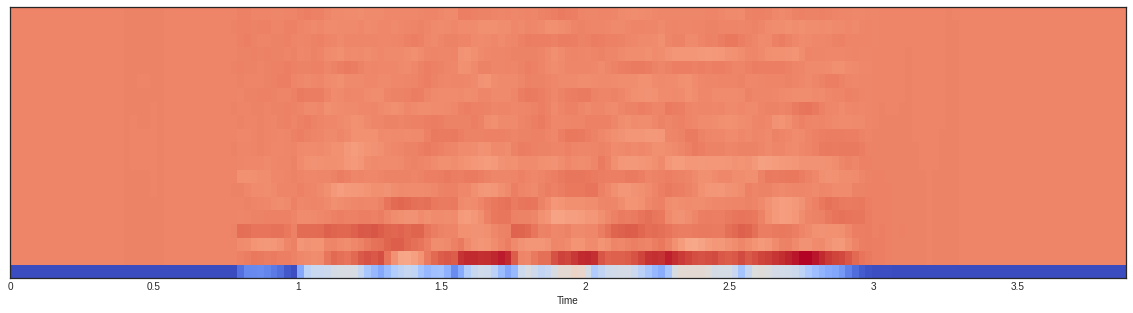

In [163]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

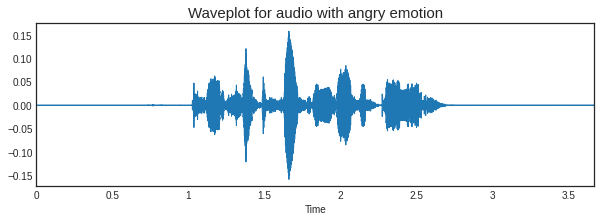

In [164]:
emotion='angry'
path = '/content/drive/My Drive/TA/RAVDESS/Actor_02/03-01-05-01-01-01-02.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

(20, 159)


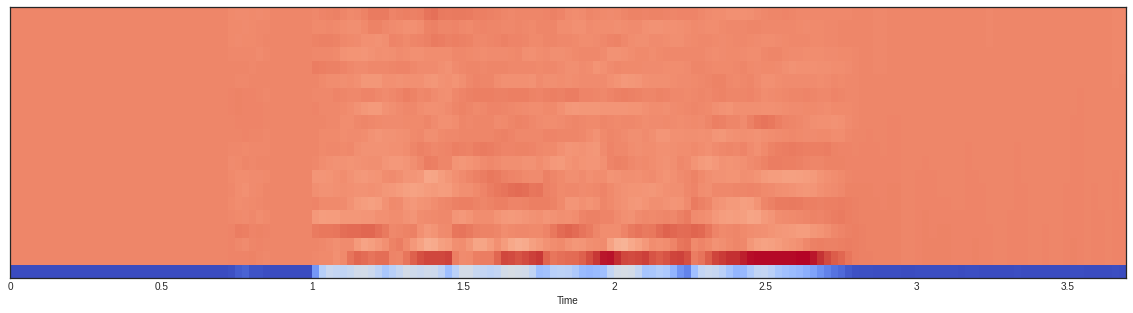

In [165]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

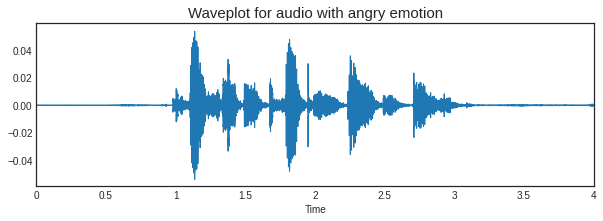

In [166]:
emotion='angry'
path = '/content/drive/My Drive/TA/RAVDESS/Actor_03/03-01-05-01-01-01-03.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

(20, 173)


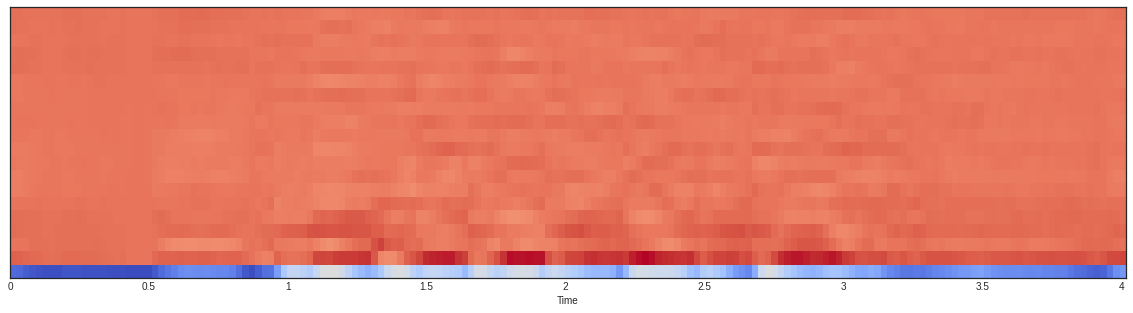

In [167]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

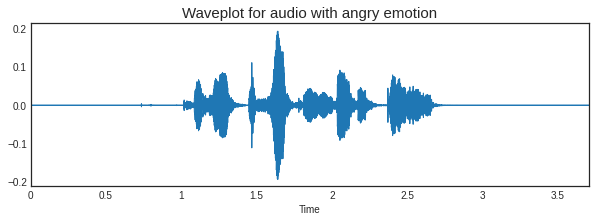

In [168]:
emotion='angry'
path = '/content/drive/My Drive/TA/RAVDESS/Actor_04/03-01-05-01-01-01-04.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

(20, 160)


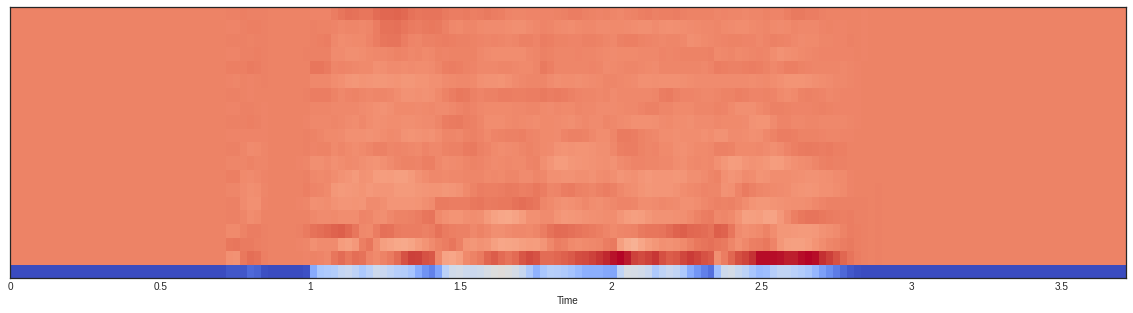

In [169]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

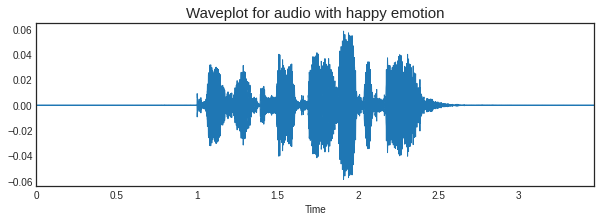

In [170]:
emotion='happy'
path = '/content/drive/My Drive/TA/RAVDESS/Actor_01/03-01-03-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

(20, 150)


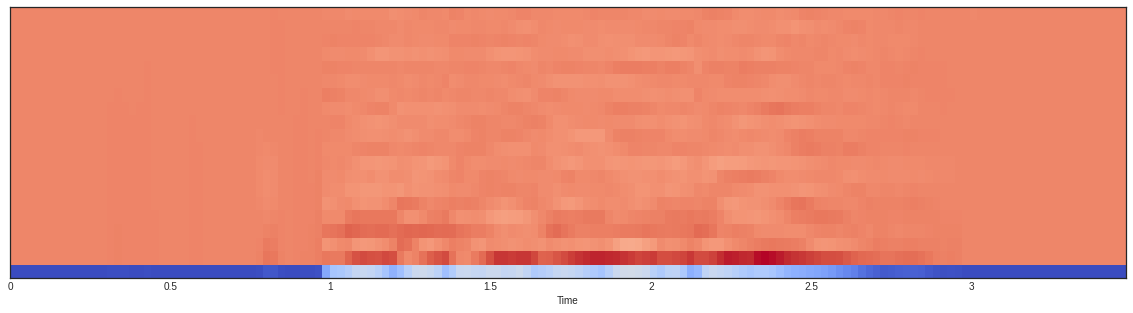

In [171]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

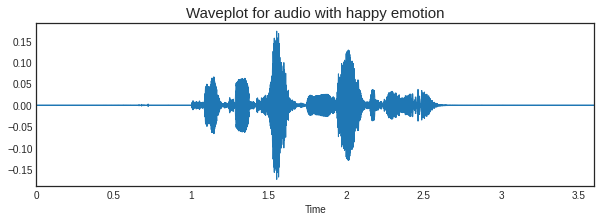

In [172]:
emotion='happy'
path = '/content/drive/My Drive/TA/RAVDESS/Actor_02/03-01-03-01-01-01-02.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

(20, 156)


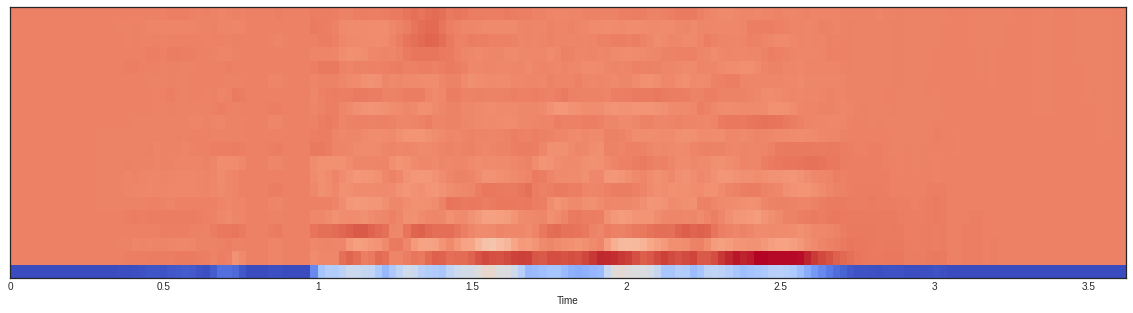

In [173]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

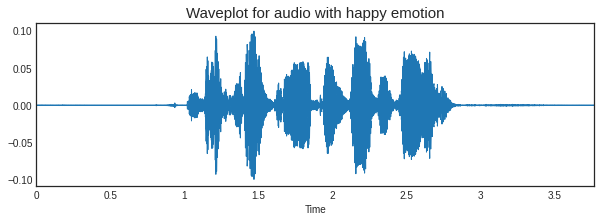

In [174]:
emotion='happy'
path = '/content/drive/My Drive/TA/RAVDESS/Actor_03/03-01-03-01-01-01-03.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

(20, 163)


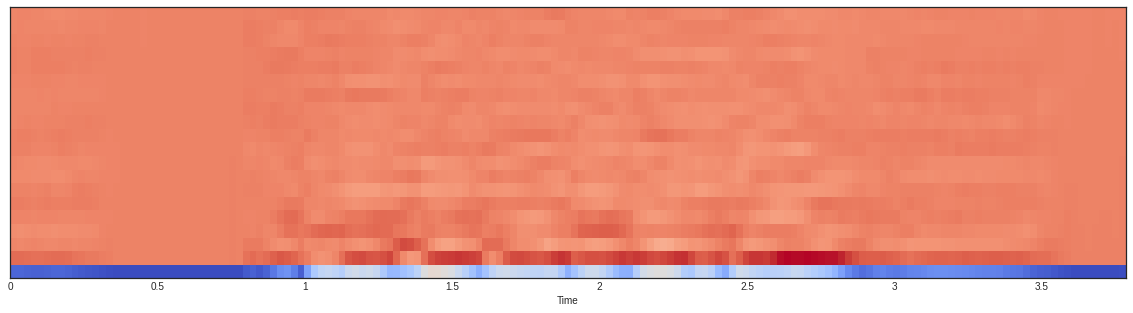

In [176]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

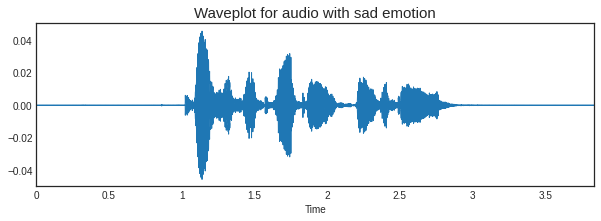

In [177]:
emotion='sad'
path = '/content/drive/My Drive/TA/RAVDESS/Actor_01/03-01-04-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

(20, 166)


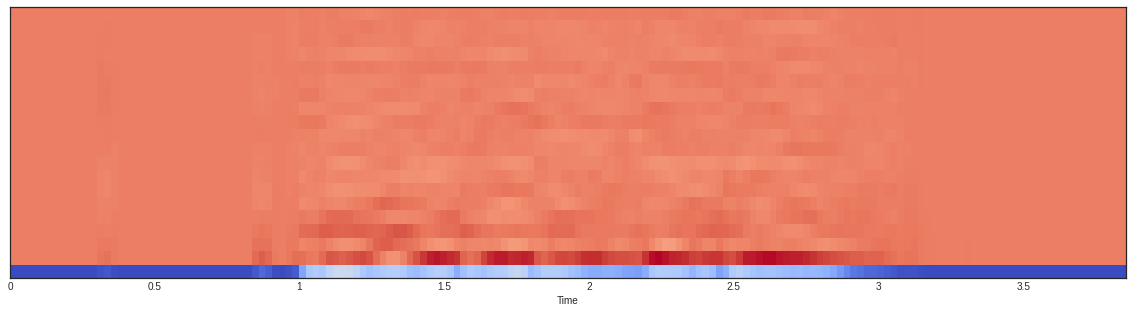

In [178]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

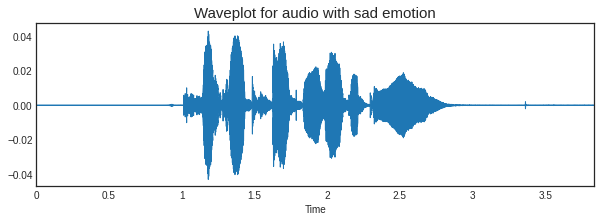

In [188]:
emotion='sad'
path = '/content/drive/My Drive/TA/RAVDESS/Actor_02/03-01-04-01-01-01-02.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

(20, 166)


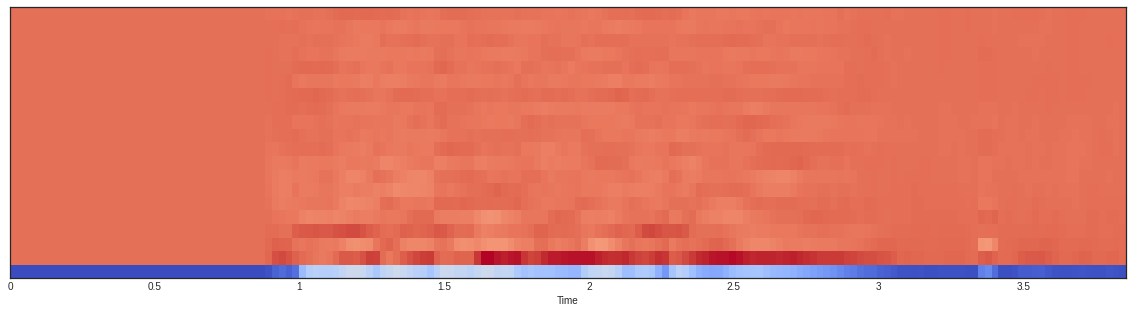

In [189]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

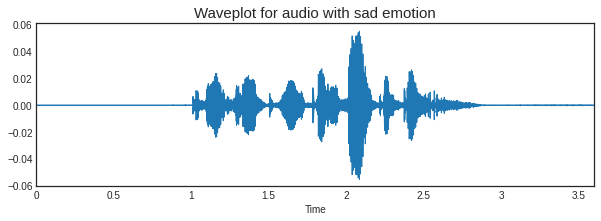

In [184]:
emotion='sad'
path = '/content/drive/My Drive/TA/RAVDESS/Actor_03/03-01-04-01-01-01-03.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

(20, 156)


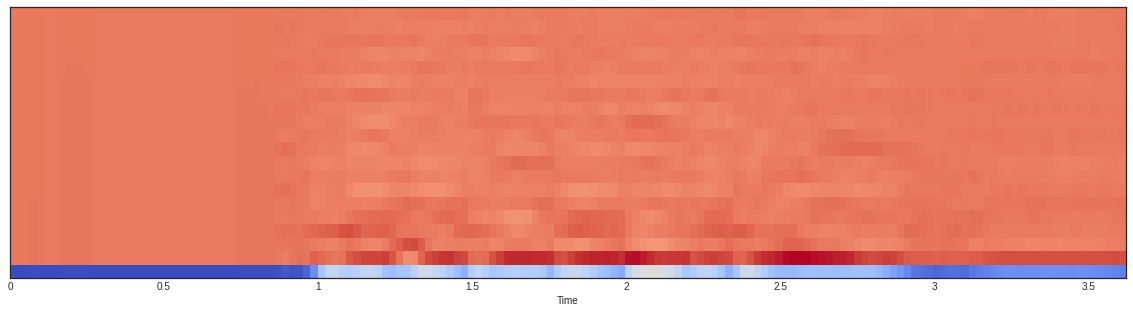

In [185]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

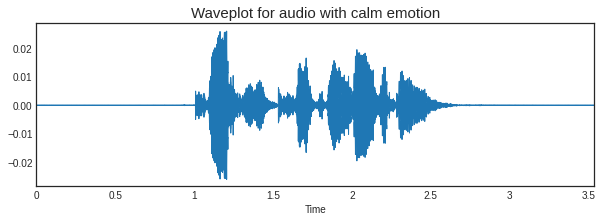

In [191]:
emotion='calm'
path = '/content/drive/My Drive/TA/RAVDESS/Actor_01/03-01-02-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

(20, 153)


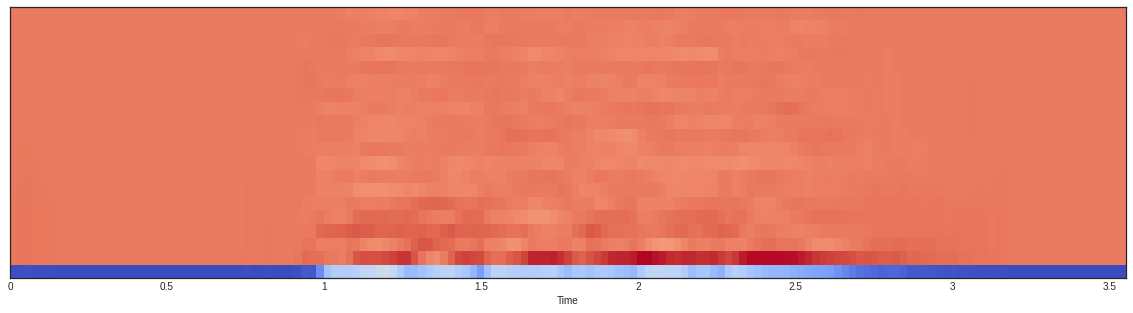

In [192]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

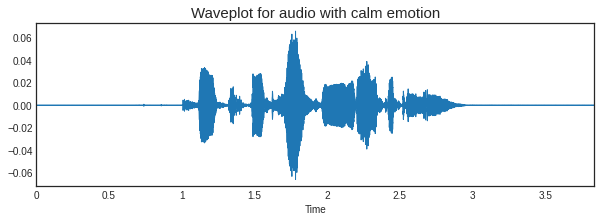

In [193]:
emotion='calm'
path = '/content/drive/My Drive/TA/RAVDESS/Actor_02/03-01-02-01-01-01-02.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

(20, 166)


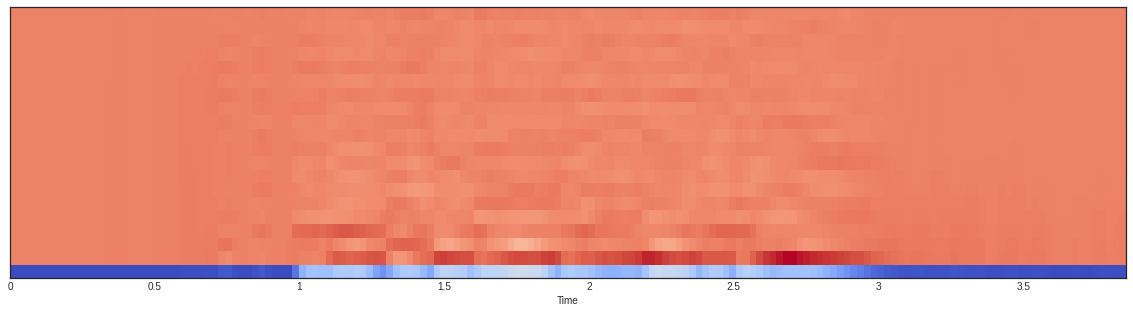

In [194]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')

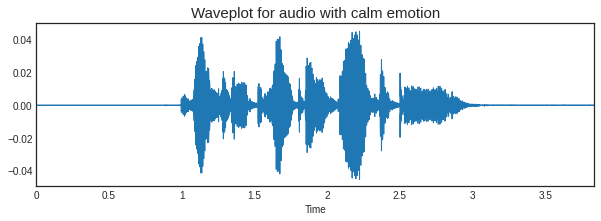

In [199]:
emotion='calm'
path = '/content/drive/My Drive/TA/RAVDESS/Actor_03/03-01-02-01-01-01-03.wav'
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
Audio(path)

(20, 166)


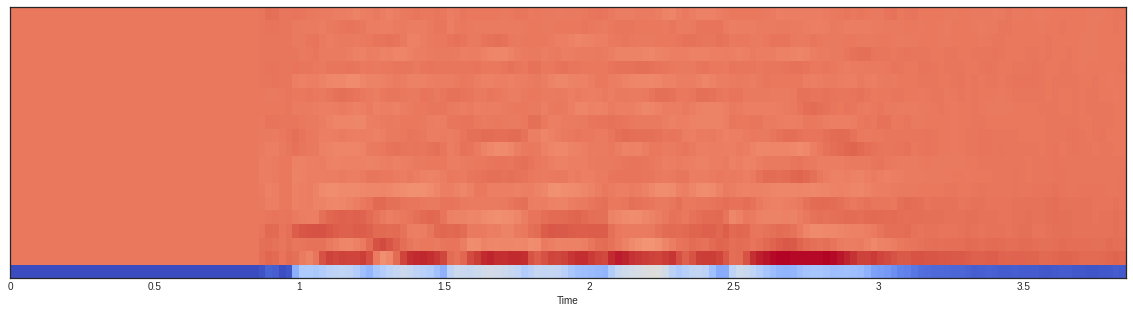

In [200]:
# MFCC
plt.figure(figsize=(20,5))
mfccs = librosa.feature.mfcc(data, sr=sampling_rate)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sampling_rate, x_axis='time')